In [63]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [177]:
roles_df = pd.read_csv('../dice_data_scientist_roles.csv').drop('Unnamed: 0', axis=1)

In [178]:
# drop any unrelated roles that may have come through 
roles_df = roles_df[roles_df.positions.str.lower().apply(lambda row: 'data scientist' in row)]
roles_df = roles_df.fillna('')

In [179]:
roles_df['remote'] = roles_df.locations.str.lower().apply(lambda row: 'remote' in row).astype(int)

In [180]:
roles_df

,positions,locations,company_names,posted_dates,descriptions,remote
0,Data Scientist,"Remote or Jersey City, NJ, USA",Randstad Technologies,Posted 10 days ago,job summary: Data Scientist for Compliance Sys...,1
1,Data Scientist (Expert),"St. Louis, MO, USA",Experis,Posted 2 days ago,Data Scientist: Design and develop simulation ...,0
2,Data Scientist,Remote,Global Data Management Inc,Posted 3 days ago,W2 only Need to have basic knowledge of Any pr...,1
3,Data Scientist,Remote,Softcrylic,Posted 4 days ago,"Who We Are For more than 20 years, we have bee...",1
4,Sr Data Scientist,"Remote or Ada, MI, USA",Randstad Technologies,Posted 5 days ago,job summary: We need a Senior Data Scientist w...,1
...,...,...,...,...,...,...
307,Data Scientist,"Livermore, CA, USA",Lawrence Livermore National Laboratory,Posted 60+ days ago,Company Description Join us and make YOUR mark...,0
308,Data Scientist,Remote,World Wide Technology,Posted 60+ days ago,DATA SCIENTIST Why WWT? Fueled by creativity a...,1
309,Data Scientist,"Chantilly, VA, USA",Josef Group,Posted 60+ days ago,Data Scientist Leverages data science and NLP ...,0
310,Machine Learning / Data Scientist / AI *** Dir...,"South San Francisco, CA, USA","Projas Technologies, LLC",Posted 60+ days ago,Immediate need for senior machine learning/AI ...,0


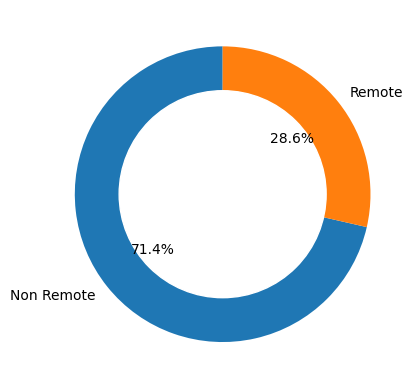

In [32]:
import matplotlib.pyplot as plt

data = roles_df.remote.value_counts().values

# Labels for the data
labels = ['Non Remote','Remote']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a pie chart and specify the properties
pie_chart = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)

# Create a circle to make the donut chart
circle = plt.Circle((0,0), 0.7, color='white')

# Add the circle to the plot
ax.add_artist(circle)

# Display the donut chart
plt.show()


In [34]:
list(roles_df.descriptions)

['job summary: Data Scientist for Compliance Systems Division primarily responsible for aggregating and analyzing data to create actionable insights to drive the results. Uses advanced statistical techniques to provide deeper understanding of data behavior and actions and collaborates with business partners to recommend improvements across the application. Identify opportunities to leverage statistical solutions to solve problems. location: Jersey City, New Jersey job type: Contract salary:',
 'Data Scientist: Design and develop simulation models for real world operating facilities and mfg sites using high level programming languages (Java/Python) or commercial software (Anylogic). Masters degree in Mathematics, Statistics, Industrial Engineering, Operations Research, or a related field with Statistics courses with 2 yrs of industry experience. Strong mastery in development of discrete event simulation models Strong fluency in Python/Java using object oriented programming and creating'

RuntimeError: self must be a matrix

In [203]:
import torch.nn.functional as F
import torch
from transformers import BertTokenizer, BertModel

# Set the device to run on (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the BERT tokenizer and model
tokens = BertModel.from_pretrained('bert-base-uncased').to(device)



def get_similarity_of_query_to_phrase(query, document):
    # Tokenize the query and convert it to a tensor
    query_tokens = torch.tensor([tokenizer.encode(query, add_special_tokens=True)]).to(device)

    # Extract the embeddings for the query
    with torch.no_grad():
        query_embeddings = model(query_tokens)[0]

    # Tokenize the document and convert it to a tensor
    document_tokens = torch.tensor([tokenizer.encode(document, add_special_tokens=True)]).to(device)

    # Extract the embeddings for the document
    with torch.no_grad():
        document_embeddings = model(document_tokens)[0]
        
    return F.cosine_similarity(query_embeddings.mean(dim=1), document_embeddings.mean(dim=1))


In [253]:
for description in np.random.choice(roles_df.descriptions, size=5):
    print()
    doc = nlp(description)
    print(description)
    for i,token in enumerate(doc):
        if token.like_num:
            phrase_containing_number = doc[i:i+6].text
            if 'month' not in phrase_containing_number.lower() and 'week' not in phrase_containing_number.lower():
                sim = get_similarity_of_query_to_phrase("years experience", phrase_containing_number)
                if sim[0]>=0.65:
                    print('extracted phrase:    ',phrase_containing_number)
                    print('similarity:    ',sim)


Job#: 1312442 Job Description: Apex Systems is looking for an Agronomic data scientist in the Des Moines Metropolitan area the role will work in a hybrid capacity Tuesday - Thursday. If you are interested in the opportunity send your email to Responsibilities: Candidate will be involved in many digital disease and insect management projects within our farming solutions and digital department. The role will consist of data collection, data scrubbing, building models using machine learning approa

A New York City tech startup that provides an AI engine for real time data analytical software used by the pharmaceutical chain, is seeking a Senior Data Scientist/ Machine Learning Engineer As a Senior Data Scientist, you'll be working on their core engine, building out machine learning models & pipelines and putting them into production. This will also be client facing. Required Skills & Experience Computer Science degree or relatable Machine learning models experience Knowledge of the cloud

In [301]:
years_of_experience=[]
for description in roles_df.descriptions:
    role_years_of_experience = np.nan
    doc = nlp(description)
    for i,token in enumerate(doc):
        if token.like_num:
            phrase_containing_number = doc[i:i+6].text
            if 'month' not in phrase_containing_number.lower() and 'week' not in phrase_containing_number.lower():
                sim = get_similarity_of_query_to_phrase("years experience", phrase_containing_number)
                if sim[0]>=0.65:
                    # numeric_token = convert_written_number_to_int(token)
                    role_years_of_experience = token.text
    years_of_experience.append(role_years_of_experience)
roles_df['years_of_experience'] = years_of_experience       

In [302]:
roles_df['years_of_experience'].info()


<class 'pandas.core.series.Series'>
Int64Index: 308 entries, 0 to 317
Series name: years_of_experience
Non-Null Count  Dtype 
--------------  ----- 
52 non-null     object
dtypes: object(1)
memory usage: 4.8+ KB


In [267]:
sum(~roles_df.years_of_experience.isna())

52

In [305]:
roles_df.years_of_experience = pd.to_numeric(roles_df.years_of_experience, downcast='integer', errors='coerce')
roles_df.years_of_experience.dtype

dtype('float64')

In [257]:
pd.options.display.max_colwidth = -1
roles_df[~roles_df.years_of_experience.isna()].iloc[:,-3:]
pd.reset_option('max_colwidth')

/var/folders/yc/nw4pnx310zl4yxbsxfr7tmv00000gn/T/ipykernel_25922/530216761.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.options.display.max_colwidth = -1


,descriptions,remote,years_of_experience
1,"Data Scientist: Design and develop simulation models for real world operating facilities and mfg sites using high level programming languages (Java/Python) or commercial software (Anylogic). Masters degree in Mathematics, Statistics, Industrial Engineering, Operations Research, or a related field with Statistics courses with 2 yrs of industry experience. Strong mastery in development of discrete event simulation models Strong fluency in Python/Java using object oriented programming and creating",0,2
5,Data Scientist UDF Remote Long Term Level: Principal (14+ years Data Science experience) Details: Need help tuning promotion and inventory/sales forecasting (Data is loaded but uncertain how clean it is). 1) SAP Retail Data Scientists to evaluate the characteristics of product Demand Influencing Factors (DIFs) such as promotions . 2) SAP Retail Data Scientist to identify when sales is affected by public holidays like Christmas/Thanksgiving &other calendar events and suggest how they shoul,1,14
6,"Position: Lead Data Scientist Location:Remote Duration: Full Time Job Qualifications / Requirements: Advanced degree (MS, PhD, or equivalent) in Operations Research or a related quantitative field4+ years (or 3+ years if PhD) of airline or related business experience at successive levels in analytical fields solving complex business problems2+ years of proven ability in innovation to create business value through mathematical programming, statistics, and/or econometric modeling3+ years o",1,3
14,"CEIs Fortune 50 client in Media and Telecommunications is looking for a Data Scientist to analyze data using Data science python libraries. The ideal candidate has a deep understanding and experience in the field of Machine Learning, Deep Learning(CNN, LSTM, RNN, Bi-LSTM) and statistical learning. You will develop predictive and statistical models using big data infrastructure based on real-time data. Requirements Must have minimum of 1-2 years of industry experience in developing data science m",0,2
18,"Greetings..!! Hope you are doing great today!! Please review the job description if you find yourself comfortable with the description please share with me your updated resume along with the best rate of what you are looking for. Job Title: Data Scientist IV Location: Bellevue, Washington (Hybrid) (2-3 days onsite in a week) Duration: 12+ months Submit candidates with Valid linkedin profile and i94 copy Qualifications: At least 7 years relevant experience required. Help us discover the inf",0,7
26,"Role: Machine Learning Engineer Location: Westlake, TX (1 week onsite/Month) Duration: 12+ Months W2 Only Must Haves: Python (programing building a model EDA and data analytic) Analytics – analytical mindset to find out patternsSnowflake – Big DataThe Expertise and Skills You BringBS/MS in Engineering, Computer Science or Data ScienceStrong Problem Solver and Mathematical thinkingStrong analytic skills related to working with both structured and unstructured datasets.1-5 years of software deve",0,5
27,"Data Scientist Onsite About the Job Duration: 3 years w/ possible extensionLocation: Jackson, Mississippi Pay rate: HourlyJob ID: 112566 Overview DataSoft Technologies is seeking a Data Scientist for our clients in Jackson, MS. Requirements: 7 years working as a data scientist with Information Technology (IT) projects.3 years' experience working with Medicaid programs to develop organizational data strategy and improve data qualityby reinforcing data integrity3 years' experience with b",0,7
31,"ThirdEye is looking for a Sr. Data Scientist with a minimum of 5-7 years of experience. In this role, the candidate should be highly analytical with a knack for analysis, math, and statistics. Critical thinking and problem-solving skills are essential. RESPONSIBILITIES The responsibilities include analyzing large volumes of telemetry data to discover trends and patterns, building predictive models and machine-learning a

In [312]:
roles_df['years_of_experience'] = roles_df['years_of_experience'].mask(roles_df['years_of_experience'] > 30, np.nan)


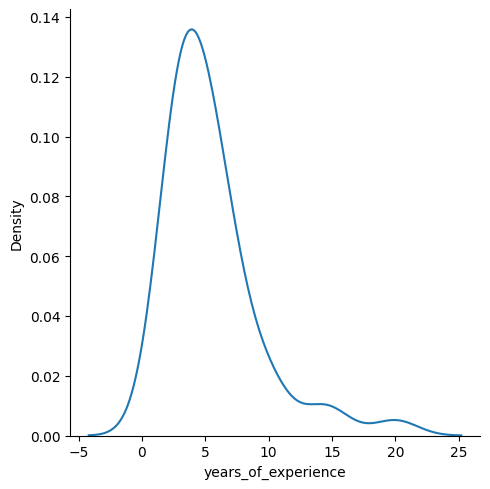

In [326]:
sns.displot(roles_df, x="years_of_experience", kind="kde")


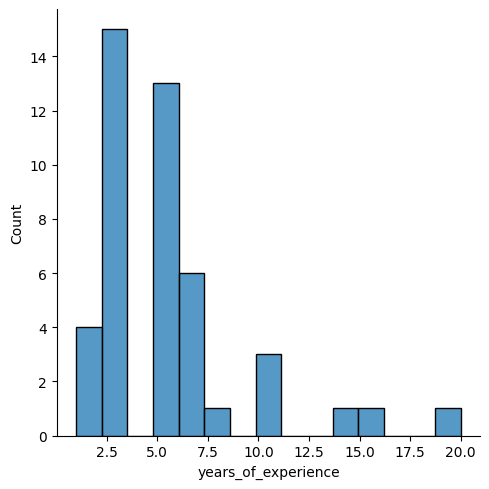

In [424]:
sns.displot(roles_df, x="years_of_experience", bins=15)



In [338]:
# what do numbers mean?
experience_level_to_synonyms = {'junior':['jr','junior','entry'],'senior':['sr','senior','principal','expert','lead']}


def get_experience_level_from_keyword(position_title):
    position_title=position_title.lower()
    for level,keywords in experience_level_to_synonyms.items():
        for keyword in keywords:
            if keyword in position_title:
                return level
roles_df['role_level'] = roles_df.positions.apply(lambda position: get_experience_level_from_keyword(position) if get_experience_level_from_keyword(position) else 'mid-level')

<AxesSubplot: >

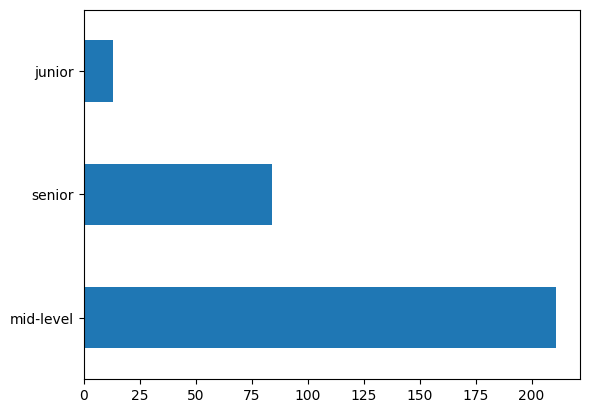

In [350]:
roles_df.role_level.value_counts().plot(kind='barh')

In [339]:
roles_df[['positions','role_level']]

,positions,role_level
0,Data Scientist,mid-level
1,Data Scientist (Expert),senior
2,Data Scientist,mid-level
3,Data Scientist,mid-level
4,Sr Data Scientist,senior
...,...,...
307,Data Scientist,mid-level
308,Data Scientist,mid-level
309,Data Scientist,mid-level
310,Machine Learning / Data Scientist / AI *** Dir...,mid-level


<AxesSubplot: xlabel='years_of_experience', ylabel='role_level'>

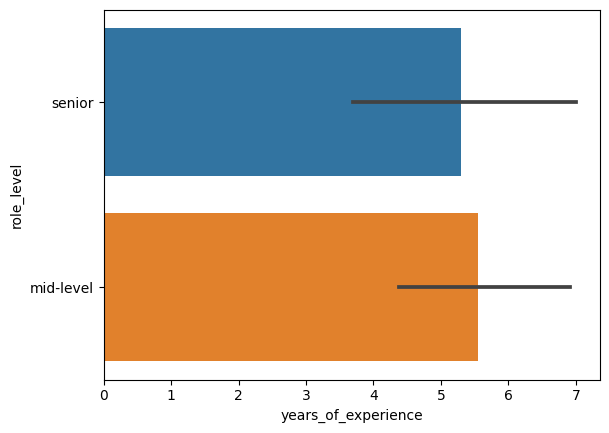

In [348]:
sns.barplot(x="years_of_experience", y="role_level", data=roles_df[~roles_df.years_of_experience.isna()])


<AxesSubplot: xlabel='years_of_experience', ylabel='Count'>

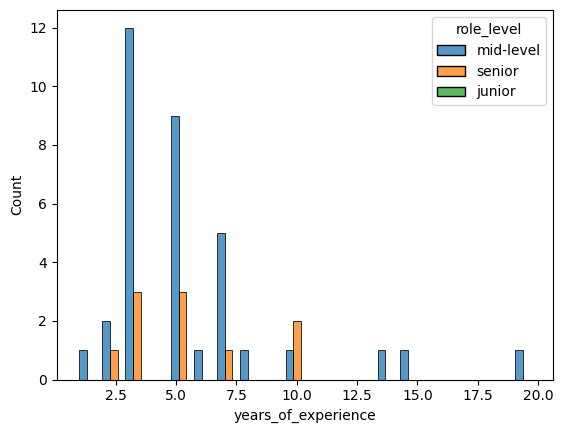

In [378]:
sns.histplot(x="years_of_experience", hue="role_level", multiple="dodge", data=roles_df, bins=20)

<AxesSubplot: ylabel='Density'>

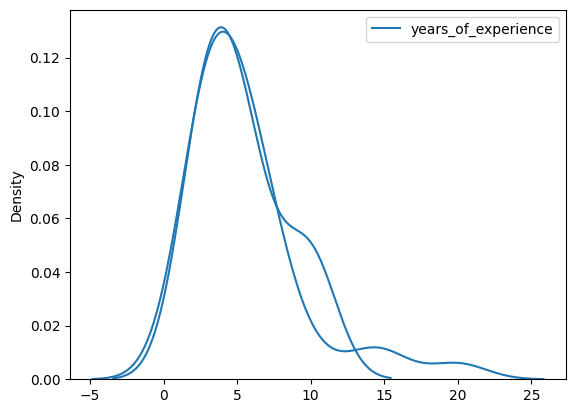

In [399]:
# Reshape the data from wide to long format
#roles_long = 
experience_not_empty = ~roles_df.years_of_experience.isna()
role_level_senior = roles_df.role_level=='senior'
role_level_mid = roles_df.role_level=='mid-level'
senior = roles_df[experience_not_empty & role_level_senior][['role_level','years_of_experience']]
mid = roles_df[(experience_not_empty) & (role_level_mid)][['role_level','years_of_experience']]
# Create a kernel density plot of the reshaped data
sns.kdeplot(senior)
sns.kdeplot(mid)

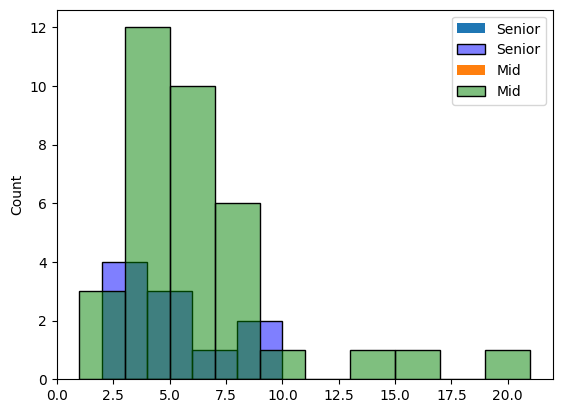

In [417]:
sns.histplot(senior, binwidth=2, palette=['b'], label='Senior')
sns.histplot(mid, binwidth=2, palette=['g'], label='Mid')

plt.legend()

# for the five years and below, its probably due to the requirement of a phd

In [407]:
list(roles_df.value_counts('positions').index) # would be really interesting to see the related industries 

['Data Scientist',
 'Senior Data Scientist',
 'Data Scientist III',
 'Lead Data Scientist',
 'Entry Level Data Scientist',
 'Sr. Data Scientist',
 'Principal, Data Scientist',
 'Staff Data Scientist',
 'Principal Data Scientist',
 'Sr Data Scientist',
 'Data Scientists Analysts',
 'Junior Data Scientist',
 'Data Scientist - Onsite in Richmond, VA w/some remote flex',
 'Data Scientist IV',
 'Data Scientist UDF',
 'Data Scientist (ML Engineer)',
 'Senior Data Scientist (Remote)',
 'Principal / Staff Data Scientist',
 '2023 SETUP Technology Full Time Program - Data Scientist - New York',
 'Machine Learning Data Scientist',
 'Naval Aviation Enterprise NAE Data Scientist',
 'National Security Data Scientist/Statistical Research Programmer',
 'NYL Data Scientist/Statistician Internship',
 'NASA Data Scientist',
 'Direct-To-Consumer Data Scientist for Health & Wellness Start-Up',
 'Ecommerce Data Scientist',
 'Entry level data scientist',
 'Mid Level Data Scientist',
 'Machine Learning Engine

In [423]:
roles_df.descriptions[220]

'Founded in 2019 this Series A San Francisco based start up is already tracking $4.4 billion in revenue and 4.3 billions pageviews annually. Instead of companies building out their own data warehouse this company steps in and can track internal sales across marketing channels. They are hiring for a hybrid MLE and Data Science role ASAP! Required Skills 5+ years of relevant MLE experience Expert in Python and SQL Strong communication skills The Offer Competitive Pay: $180-200K base Benefits He'

In [ ]:
# does not seem